<a href="https://colab.research.google.com/github/ayushshah04/On-Balance-Volume-OBV-Stock-Trading-Strategy-Using-Python.ipynb/blob/main/On_Balance_Volume_(OBV)_Stock_Trading_Strategy_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Descriotion : This programe uses on balace Volume (OBV) to determine when to buy and sell stock

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the data
from google.colab import files
files.upload()

Saving AAPL.csv to AAPL.csv


{'AAPL.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2019-11-29,66.650002,67.000000,66.474998,66.812500,65.702515,46617600\n2019-12-02,66.817497,67.062500,65.862503,66.040001,64.942841,94487200\n2019-12-03,64.577499,64.882500,64.072502,64.862503,63.784916,114430400\n2019-12-04,65.267502,65.827499,65.169998,65.434998,64.347893,67181600\n2019-12-05,65.947502,66.472504,65.682503,66.394997,65.291946,74424400\n2019-12-06,66.870003,67.750000,66.824997,67.677498,66.553131,106075600\n2019-12-09,67.500000,67.699997,66.227501,66.730003,65.621384,128042400\n2019-12-10,67.150002,67.517502,66.464996,67.120003,66.004898,90420400\n2019-12-11,67.202499,67.775002,67.125000,67.692497,66.567886,78756800\n2019-12-12,66.945000,68.139999,66.830002,67.864998,66.737518,137310400\n2019-12-13,67.864998,68.824997,67.732498,68.787498,67.644707,133587600\n2019-12-16,69.250000,70.197502,69.245003,69.964996,68.802635,128186000\n2019-12-17,69.892502,70.442497,69.699997,70.102501,68.937851,114158400\n2019-12-18,6

In [ ]:
#store the Data
df = pd.read_csv('AAPL.csv')
#Show the data
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-11-29,2019-11-29,66.650002,67.000000,66.474998,66.812500,65.702515,46617600
2019-12-02,2019-12-02,66.817497,67.062500,65.862503,66.040001,64.942841,94487200
2019-12-03,2019-12-03,64.577499,64.882500,64.072502,64.862503,63.784916,114430400
2019-12-04,2019-12-04,65.267502,65.827499,65.169998,65.434998,64.347893,67181600
2019-12-05,2019-12-05,65.947502,66.472504,65.682503,66.394997,65.291946,74424400
...,...,...,...,...,...,...,...
2020-11-20,2020-11-20,118.639999,118.769997,117.290001,117.339996,117.339996,73391400
2020-11-23,2020-11-23,117.180000,117.620003,113.750000,113.849998,113.849998,127959300
2020-11-24,2020-11-24,113.910004,115.849998,112.589996,115.169998,115.169998,113874200
2020-11-25,2020-11-25,115.550003,116.750000,115.169998,116.029999,116.029999,76499200


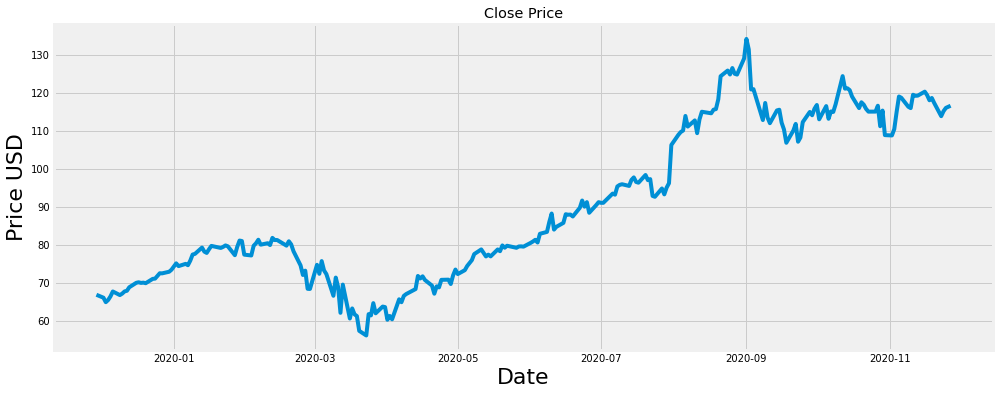

In [ ]:
#Visuallay show the stock price
plt.figure(figsize=(15,6))
plt.plot(df['Close'],label= 'Close')
plt.title('Close Price')
plt.title('Close Price')
plt.xlabel('Date', fontsize = 22)
plt.ylabel('Price USD',fontsize = 22)
plt.show()

In [ ]:
#calculate the On Balance Volume (OBV)
OBV = []
OBV.append(0)
#Loop through the data set (close price) from the second row in (index 1) to the end of the data
for i in range(1,len(df.Close)):
  if df.Close[i]> df.Close[i-1]:
    OBV.append(OBV[-1] + df.Volume[i])
  elif df.Close[i]<df.Close[i-1]:
    OBV.append(OBV[-1]-df.Volume[i])
  else:
      OBV.append(OBV[-1])

In [ ]:
# Store the OBV and OBV Exponential Moving Average (EMA) into the colums
df['OBV'] = OBV
df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA
2019-11-29,2019-11-29,66.650002,67.000000,66.474998,66.812500,65.702515,46617600,0,0.000000e+00
2019-12-02,2019-12-02,66.817497,67.062500,65.862503,66.040001,64.942841,94487200,-94487200,-4.960578e+07
2019-12-03,2019-12-03,64.577499,64.882500,64.072502,64.862503,63.784916,114430400,-208917600,-1.081041e+08
2019-12-04,2019-12-04,65.267502,65.827499,65.169998,65.434998,64.347893,67181600,-141736000,-1.178131e+08
2019-12-05,2019-12-05,65.947502,66.472504,65.682503,66.394997,65.291946,74424400,-67311600,-1.055972e+08
...,...,...,...,...,...,...,...,...,...
2020-11-20,2020-11-20,118.639999,118.769997,117.290001,117.339996,117.339996,73391400,1346109200,1.471320e+09
2020-11-23,2020-11-23,117.180000,117.620003,113.750000,113.849998,113.849998,127959300,1218149900,1.447208e+09
2020-11-24,2020-11-24,113.910004,115.849998,112.589996,115.169998,115.169998,113874200,1332024100,1.436238e+09
2020-11-25,2020-11-25,115.550003,116.750000,115.169998,116.029999,116.029999,76499200,1408523300,1.433599e+09


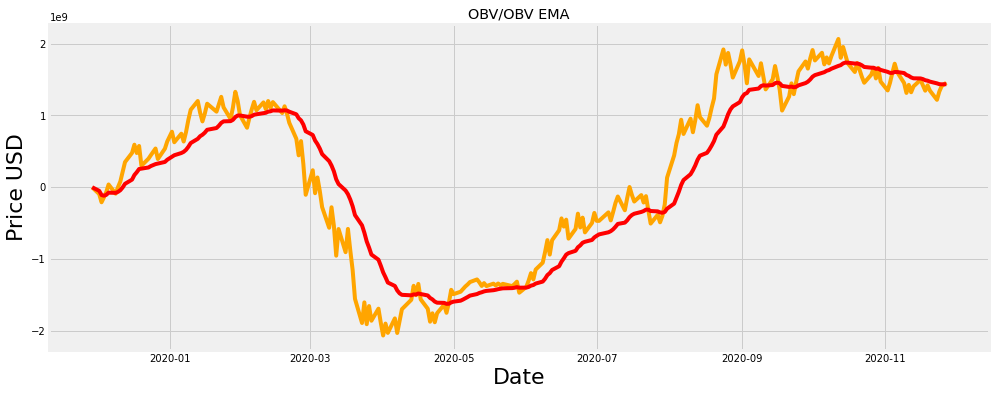

In [ ]:
#create and plot the graph
plt.figure(figsize=(15,6))
plt.plot(df['OBV'],label= 'OBV', color = 'orange')
plt.plot(df['OBV_EMA'],label= 'OBV_EMA', color = 'red')
plt.title('OBV/OBV EMA')
plt.xlabel('Date', fontsize = 22)
plt.ylabel('Price USD',fontsize = 22)
plt.show()

In [ ]:
# create a function to signal when to buy and sell the stock
#IF OBV > OBV_EMA Then Buy
#IF OBV < OBV_EMA Then Sell
#Else Do Nothing 

def buy_sell(signal,col1,col2):
  sigPriceBuy = []
  sigPricecSell = []
  flag = -1
# loop through the length of the data set
  for i in range(0,len(signal)):
  #if OBV > OBV_EMA Then buy--> col1=> 'OBV" and col2 =>'OBV_EMA'
    if signal[col1][i] > signal[col2][i] and flag != 1:
      sigPriceBuy.append(signal['Close'][i])
      sigPricecSell.append(np.nan)
      flag = 1
    #IF OBV < OBV_EMA Then Sell
    elif signal[col1][i] > signal[col2][i] and flag != 0:
      sigPricecSell.append(signal['Close'][i])
      sigPriceBuy.append(np.nan)
      flag = 0
    else:
      sigPricecSell.append(np.nan)
      sigPriceBuy.append(np.nan)
  return (sigPriceBuy,sigPricecSell)


In [ ]:
#create buy and sell colums
x = buy_sell(df, 'OBV', 'OBV_EMA') 
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
 #show the data set
df

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
2019-11-29,2019-11-29,66.650002,67.000000,66.474998,66.812500,65.702515,46617600,0,0.000000e+00,NaN,NaN
2019-12-02,2019-12-02,66.817497,67.062500,65.862503,66.040001,64.942841,94487200,-94487200,-4.960578e+07,NaN,NaN
2019-12-03,2019-12-03,64.577499,64.882500,64.072502,64.862503,63.784916,114430400,-208917600,-1.081041e+08,NaN,NaN
2019-12-04,2019-12-04,65.267502,65.827499,65.169998,65.434998,64.347893,67181600,-141736000,-1.178131e+08,NaN,NaN
2019-12-05,2019-12-05,65.947502,66.472504,65.682503,66.394997,65.291946,74424400,-67311600,-1.055972e+08,66.394997,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-20,2020-11-20,118.639999,118.769997,117.290001,117.339996,117.339996,73391400,1346109200,1.471320e+09,NaN,NaN
2020-11-23,2020-11-23,117.180000,117.620003,113.750000,113.849998,113.849998,127959300,1218149900,1.447208e+09,NaN,NaN
2020-11-24,2020-11-24,113.910004,115.849998,112.589996,115.169998,115.169998,113874200,1332024100,1.436238e+09,NaN,NaN
2020-11-25,2020-11-25,115.550003,116.750000,115.169998,116.029999,116.029999,76499200,1408523300,1.433599e+09,NaN,NaN


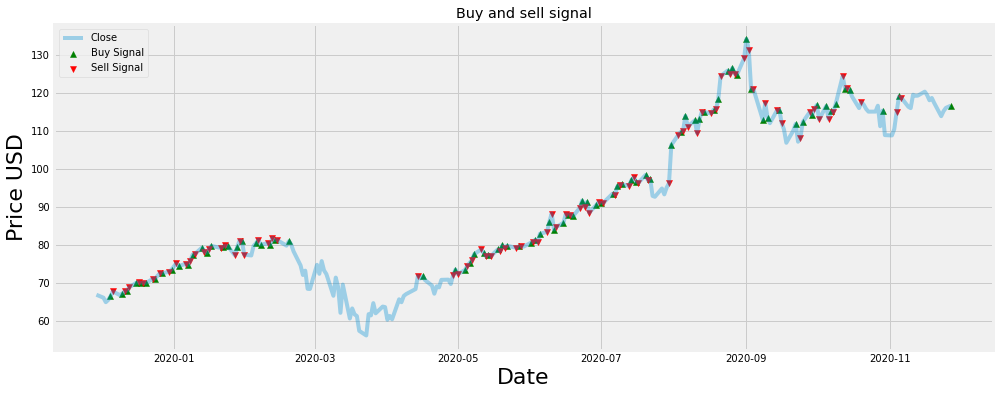

In [ ]:
#plot the Buy and sell prices
plt.figure(figsize=(15,6))
plt.plot(df['Close'],label= 'Close',alpha = 0.35)
plt.scatter(df.index,df['Buy_Signal_Price'],label= 'Buy Signal',marker = '^', alpha = 1,color = 'green')
plt.scatter(df.index,df['Sell_Signal_Price'],label= 'Sell Signal',marker = 'v',alpha = 1,color = 'red')
plt.title('Buy and sell signal')
plt.xlabel('Date', fontsize = 22)
plt.ylabel('Price USD',fontsize = 22)
plt.legend(loc= 'upper left')
plt.show()